In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
import numpy as np
# Importing Linear regression from sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.simplefilter("ignore")

In [4]:
# Reading csv file in to a dataframe
games = pd.read_csv("vgsales.csv")
print(games.head())
print(games.shape)

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
(16598, 11)


In [5]:
games_sorted = games.sort_values(by = ['Year'])
games_sorted

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6896,6898,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.0,0.00,0.24
2669,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
5366,5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34
1969,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
1766,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.0,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.0,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.0,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.0,0.00,0.01


In [12]:
#We look at the popular genres in each region
genre_NA = games_sorted.groupby('Genre').NA_Sales.sum()
genre_NA_sorted = genre_NA.sort_values(ascending = False)
genre_EU = games_sorted.groupby('Genre').EU_Sales.sum()
genre_EU_sorted = genre_EU.sort_values(ascending = False)
genre_JP = games_sorted.groupby('Genre').JP_Sales.sum()
genre_JP_sorted = genre_JP.sort_values(ascending = False)
genre_other = games_sorted.groupby('Genre').Other_Sales.sum()
genre_other_sorted = genre_other.sort_values(ascending = False)

genre_NA_sorted[[0]],genre_EU_sorted[[0]], genre_JP_sorted[[0]],genre_other_sorted[[0]]

(Genre
 Action    877.83
 Name: NA_Sales, dtype: float64,
 Genre
 Action    525.0
 Name: EU_Sales, dtype: float64,
 Genre
 Role-Playing    352.31
 Name: JP_Sales, dtype: float64,
 Genre
 Action    187.38
 Name: Other_Sales, dtype: float64)

In [28]:
games_NA = games.loc[(games['Genre'] == 'Action') ]
games_EU = games.loc[(games['Genre'] == 'Action') ]
games_JP = games.loc[(games['Genre'] == 'Role-Playing') ]
games_other = games.loc[(games['Genre'] == 'Action') ]


In [57]:
df_NA_Action = games_NA.groupby(['Year'], as_index = False)
df_NA_Action_mean = df_NA_Action[['NA_Sales']].aggregate(np.mean)
df_NA_Action_mean.head()


,Year,NA_Sales
0,1980.0,0.320000
1,1981.0,0.554400
2,1982.0,0.337222
3,1983.0,0.381429
4,1984.0,0.800000


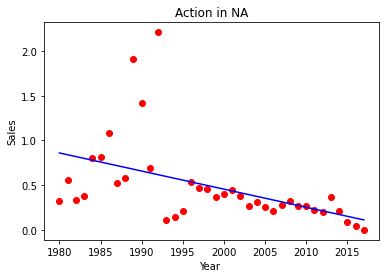

In [74]:
descriptive_feature = df_NA_Action_mean[['Year']]
target_feature = df_NA_Action_mean[['NA_Sales']]
regressor = LinearRegression(normalize=True)
regressor.fit(descriptive_feature, target_feature)
viz = plt
viz.scatter(descriptive_feature, target_feature, color='red')
viz.plot(descriptive_feature, regressor.predict(descriptive_feature), color='blue')
viz.title('Action in NA')
viz.xlabel('Year ')
viz.ylabel('Sales')
viz.show()

In [59]:
df_EU_Action = games_EU.groupby(['Year'],as_index = False)
df_EU_Action_mean = df_EU_Action[['EU_Sales']].aggregate(np.mean)
df_EU_Action_mean.head()


,Year,EU_Sales
0,1980.0,0.020000
1,1981.0,0.032400
2,1982.0,0.021111
3,1983.0,0.024286
4,1984.0,0.190000


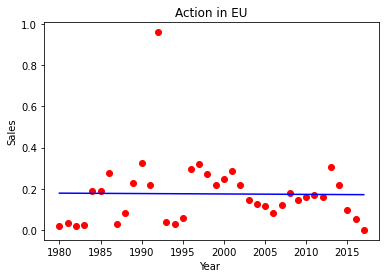

In [75]:
df_EU_Action = games_EU.groupby(['Year'],as_index = False)
df_EU_Action_mean = df_EU_Action[['EU_Sales']].aggregate(np.mean)
df_EU_Action_mean.head()

descriptive_feature = df_EU_Action_mean[['Year']]
target_feature = df_EU_Action_mean[['EU_Sales']]
regressor = LinearRegression(normalize=True)
regressor.fit(descriptive_feature, target_feature)
viz = plt
viz.scatter(descriptive_feature, target_feature, color='red')
viz.plot(descriptive_feature, regressor.predict(descriptive_feature), color='blue')
viz.title('Action in EU')
viz.xlabel('Year ')
viz.ylabel('Sales')
viz.show()

In [60]:
df_JP_Action = games_JP.groupby(['Year'],as_index = False)
df_JP_Action_mean = df_JP_Action[['JP_Sales']].aggregate(np.mean)
df_JP_Action_mean.head()

,Year,JP_Sales
0,1986.0,0.520000
1,1987.0,1.393333
2,1988.0,1.926667
3,1989.0,1.100000
4,1990.0,2.210000


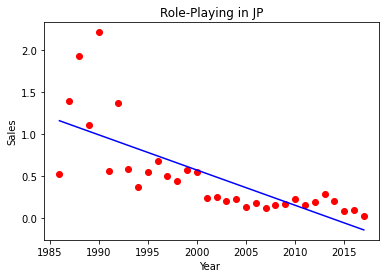

In [76]:
df_JP_Action = games_JP.groupby(['Year'],as_index = False)
df_JP_Action_mean = df_JP_Action[['JP_Sales']].aggregate(np.mean)
df_JP_Action_mean.head()

descriptive_feature = df_JP_Action_mean[['Year']]
target_feature = df_JP_Action_mean[['JP_Sales']]
regressor = LinearRegression(normalize=True)
regressor.fit(descriptive_feature, target_feature)
viz = plt
viz.scatter(descriptive_feature, target_feature, color='red')
viz.plot(descriptive_feature, regressor.predict(descriptive_feature), color='blue')
viz.title('Role-Playing in JP')
viz.xlabel('Year ')
viz.ylabel('Sales')
viz.show()

In [62]:
df_other_Action = games_other.groupby(['Year'],as_index = False)
df_other_Action_mean = df_other_Action[['Other_Sales']].aggregate(np.mean)
df_other_Action_mean.head()

,Year,Other_Sales
0,1980.0,0.000000
1,1981.0,0.004800
2,1982.0,0.002778
3,1983.0,0.002857
4,1984.0,0.030000


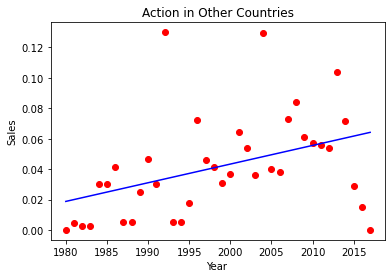

In [77]:
df_other_Action = games_other.groupby(['Year'],as_index = False)
df_other_Action_mean = df_other_Action[['Other_Sales']].aggregate(np.mean)
df_other_Action_mean.head()

descriptive_feature = df_other_Action_mean[['Year']]
target_feature = df_other_Action_mean[['Other_Sales']]
regressor = LinearRegression(normalize=True)
regressor.fit(descriptive_feature, target_feature)
viz = plt
viz.scatter(descriptive_feature, target_feature, color='red')
viz.plot(descriptive_feature, regressor.predict(descriptive_feature), color='blue')
viz.title('Action in Other Countries')
viz.xlabel('Year ')
viz.ylabel('Sales')
viz.show()

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
(16598, 11)
Genre
Action    877.83
Name: NA_Sales, dtype: float64 Genre
Action    525.0
Name: EU_Sales, dtype: float64 Genre
Role-Playing    352.31
Name: JP_Sales, d

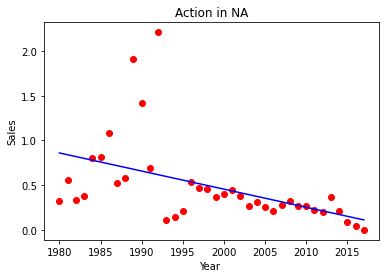

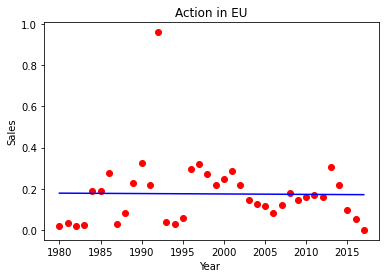

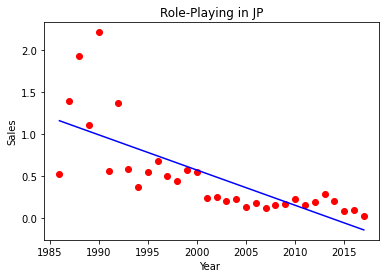

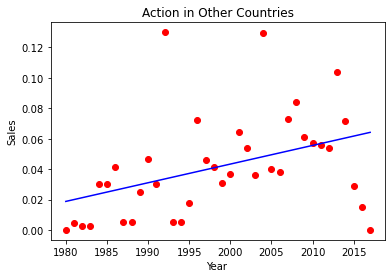

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
import numpy as np
# Importing Linear regression from sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.simplefilter("ignore")


def main():

    # Reading csv file in to a dataframe
    games = pd.read_csv("vgsales.csv")
    print(games.head())
    print(games.shape)

    #sorting by year
    games_sorted = games.sort_values(by = ['Year'])

    #We look at the popular genres in each region
    genre_NA = games_sorted.groupby('Genre').NA_Sales.sum()
    genre_NA_sorted = genre_NA.sort_values(ascending = False)
    genre_EU = games_sorted.groupby('Genre').EU_Sales.sum()
    genre_EU_sorted = genre_EU.sort_values(ascending = False)
    genre_JP = games_sorted.groupby('Genre').JP_Sales.sum()
    genre_JP_sorted = genre_JP.sort_values(ascending = False)
    genre_other = games_sorted.groupby('Genre').Other_Sales.sum()
    genre_other_sorted = genre_other.sort_values(ascending = False)

    print(genre_NA_sorted[[0]],genre_EU_sorted[[0]], genre_JP_sorted[[0]],genre_other_sorted[[0]])
    
    #getting games of top genre from each region
    games_NA = games.loc[(games['Genre'] == 'Action') ]
    games_EU = games.loc[(games['Genre'] == 'Action') ]
    games_JP = games.loc[(games['Genre'] == 'Role-Playing') ]
    games_other = games.loc[(games['Genre'] == 'Action') ]

    # NA Region - Genre Action
    df_NA_Action = games_NA.groupby(['Year'], as_index = False)
    df_NA_Action_mean = df_NA_Action[['NA_Sales']].aggregate(np.mean)
    df_NA_Action_mean.head()

    descriptive_feature = df_NA_Action_mean[['Year']]
    target_feature = df_NA_Action_mean[['NA_Sales']]
    regressor = LinearRegression(normalize=True)
    regressor.fit(descriptive_feature, target_feature)

    viz = plt
    viz.scatter(descriptive_feature, target_feature, color='red')
    viz.plot(descriptive_feature, regressor.predict(descriptive_feature), color='blue')
    viz.title('Action in NA')
    viz.xlabel('Year ')
    viz.ylabel('Sales')
    viz.show()

    # EU Region - Genre Action
    df_EU_Action = games_EU.groupby(['Year'],as_index = False)
    df_EU_Action_mean = df_EU_Action[['EU_Sales']].aggregate(np.mean)
    df_EU_Action_mean.head()

    descriptive_feature = df_EU_Action_mean[['Year']]
    target_feature = df_EU_Action_mean[['EU_Sales']]
    regressor = LinearRegression(normalize=True)
    regressor.fit(descriptive_feature, target_feature)
    viz = plt
    viz.scatter(descriptive_feature, target_feature, color='red')
    viz.plot(descriptive_feature, regressor.predict(descriptive_feature), color='blue')
    viz.title('Action in EU')
    viz.xlabel('Year ')
    viz.ylabel('Sales')
    viz.show()


    # JP Region - Genre Role Playing
    df_JP_Action = games_JP.groupby(['Year'],as_index = False)
    df_JP_Action_mean = df_JP_Action[['JP_Sales']].aggregate(np.mean)
    df_JP_Action_mean.head()

    descriptive_feature = df_JP_Action_mean[['Year']]
    target_feature = df_JP_Action_mean[['JP_Sales']]
    regressor = LinearRegression(normalize=True)
    regressor.fit(descriptive_feature, target_feature)
    viz = plt
    viz.scatter(descriptive_feature, target_feature, color='red')
    viz.plot(descriptive_feature, regressor.predict(descriptive_feature), color='blue')
    viz.title('Role-Playing in JP')
    viz.xlabel('Year ')
    viz.ylabel('Sales')
    viz.show()

    # Other Region - Genre Action

    df_other_Action = games_other.groupby(['Year'],as_index = False)
    df_other_Action_mean = df_other_Action[['Other_Sales']].aggregate(np.mean)
    df_other_Action_mean.head()

    descriptive_feature = df_other_Action_mean[['Year']]
    target_feature = df_other_Action_mean[['Other_Sales']]
    regressor = LinearRegression(normalize=True)
    regressor.fit(descriptive_feature, target_feature)
    viz = plt
    viz.scatter(descriptive_feature, target_feature, color='red')
    viz.plot(descriptive_feature, regressor.predict(descriptive_feature), color='blue')
    viz.title('Action in Other Countries')
    viz.xlabel('Year ')
    viz.ylabel('Sales')
    viz.show()   

    
if __name__ == '__main__':
    main()
